In [1]:
import csv

labels, *rows = csv.reader(open('housing.csv'))

In [2]:
print(repr(labels))
print(repr(rows[0]))
print(repr(rows[1]))
print(repr(rows[2]))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
['-122.23', '37.88', '41.0', '880.0', '129.0', '322.0', '126.0', '8.3252', '452600.0', 'NEAR BAY']
['-122.22', '37.86', '21.0', '7099.0', '1106.0', '2401.0', '1138.0', '8.3014', '358500.0', 'NEAR BAY']
['-122.24', '37.85', '52.0', '1467.0', '190.0', '496.0', '177.0', '7.2574', '352100.0', 'NEAR BAY']


In [3]:
income = [float(item[7]) for item in rows[1:]]
house_value = [float(item[8]) for item in rows[1:]]

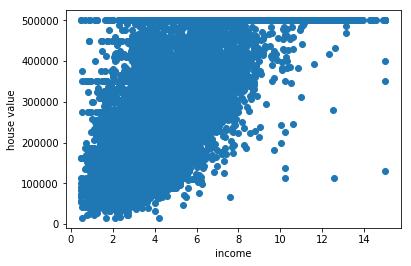

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(income, house_value)
plt.xlabel('income')
plt.ylabel('house value')

plt.show()

In [5]:
def predict(b, m, x):
    return (m * x) + b

def error(b, m, points):
    sq_error = 0
    for x, y in points:
        sq_error += (y - predict(b, m, x)) ** 2
    return sq_error / len(points)

b = 0  # y-intercept
m = 0  # Slope
points = list(zip(income, house_value))

print('Sum of square error with b,m = %.2f, %.2f: %.2f' % (b, m, error(b, m, points)))

Sum of square error with b,m = 0.00, 0.00: 56097625151.94


In [6]:
def gradient_descent_step(b, m, points):
    b_grad = 0
    m_grad = 0
    N = float(len(points))
    for x, y in points:
        local_error = y - predict(b, m, x)
        b_grad += -(2/N) * local_error
        m_grad += -(2/N) * x * local_error
    return (
        b - (learning_rate * b_grad),
        m - (learning_rate * m_grad)
    )


num_iterations = 100
learning_rate = 0.001
error_progression = []

for iteration in range(num_iterations):
    b, m = gradient_descent_step(b, m, points)
    if iteration % 5 == 0:
        error_progression.append((iteration, error(b, m, points)))

print('Done descending')
print('b, m = %.2f, %.2f' % (b, m))
print('Sum of square error = %.2f' % error(b, m, points))

Done descending
b, m = 11399.66, 47897.81
Sum of square error = 7247239772.82


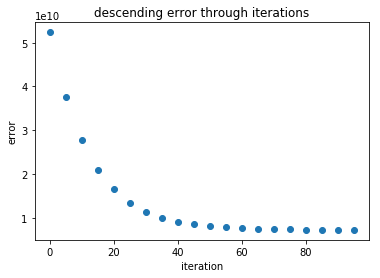

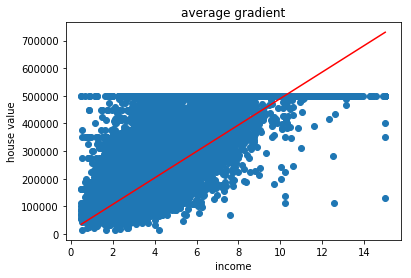

In [7]:
%matplotlib inline

iterations, errors = zip(*error_progression)
plt.scatter(iterations, errors)
plt.xlabel('iteration')
plt.ylabel('error')
plt.title('descending error through iterations')
plt.show()

plt.scatter(income, house_value)
plt.xlabel('income')
plt.ylabel('house value')
plt.plot([min(income), max(income)],
         [predict(b, m, min(income)), predict(b, m, max(income))], 'r-')
plt.title('average gradient')
plt.show()